# pandas: str.extract, str.split
* use regular expression to clean and transform data
* notebook: https://github.com/prasertcbs/pandas/blob/main/pandas_str_extract_split.ipynb

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

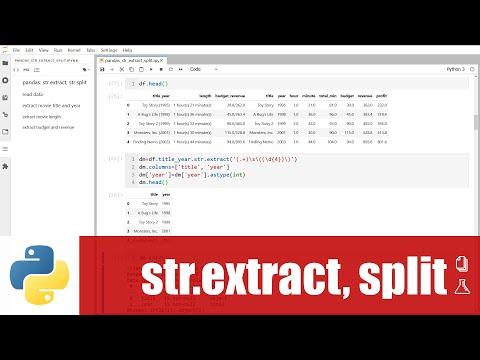

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('7spx-I6Omxk', width=720, height=405)

In [2]:
import pandas as pd

In [3]:
print(f'pandas version:  {pd.__version__}')

pandas version:  1.1.3


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-05 11:38:41.401670')

## read data 

In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/regexp_extract_split.csv'
df=pd.read_csv(url)
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


## extract movie title and year

In [6]:
# df.title_year.str.extract('(.{1,})\s\((\d{4})\)')
df.title_year.str.extract('(.+)\s\((\d{4})\)')

,0,1
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003
5,The Incredibles,2004
6,Cars,2006
7,Ratatouille,2007
8,WALL-E,2008
9,Up,2009


In [7]:
df.head()

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6


In [8]:
dm=df.title_year.str.extract('(.+)\s\((\d{4})\)')
dm.columns=['title', 'year']
dm['year']=dm['year'].astype(int)
dm.head()

,title,year
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003


In [9]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15 non-null     object
 1   year    15 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 308.0+ bytes


### extract movie length

In [10]:
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


In [11]:
df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').astype(float)

,0,1
0,1.0,21.0
1,1.0,36.0
2,1.0,32.0
3,1.0,30.0
4,1.0,44.0
5,1.0,55.0
6,1.0,56.0
7,1.0,51.0
8,1.0,37.0
9,1.0,36.0


In [12]:
dt=df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').astype(float)
dt.columns=['hour', 'minute']
dt

,hour,minute
0,1.0,21.0
1,1.0,36.0
2,1.0,32.0
3,1.0,30.0
4,1.0,44.0
5,1.0,55.0
6,1.0,56.0
7,1.0,51.0
8,1.0,37.0
9,1.0,36.0


In [13]:
dt['total_min']=dt['hour'] * 60 + dt['minute']
dt

,hour,minute,total_min
0,1.0,21.0,81.0
1,1.0,36.0,96.0
2,1.0,32.0,92.0
3,1.0,30.0,90.0
4,1.0,44.0,104.0
5,1.0,55.0,115.0
6,1.0,56.0,116.0
7,1.0,51.0,111.0
8,1.0,37.0,97.0
9,1.0,36.0,96.0


### extract budget and revenue

In [14]:
df

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3


In [15]:
df.budget_revenue.str.replace(',', '').str.split('/', expand=True).astype(float)

,0,1
0,30.0,362.0
1,45.0,363.4
2,90.0,485.0
3,115.0,528.8
4,94.0,895.6
5,92.0,631.4
6,70.0,462.0
7,150.0,623.7
8,180.0,521.3
9,175.0,731.3


In [16]:
ds=df.budget_revenue.str.replace(',', '').str.split('/', expand=True).astype(float)
ds

,0,1
0,30.0,362.0
1,45.0,363.4
2,90.0,485.0
3,115.0,528.8
4,94.0,895.6
5,92.0,631.4
6,70.0,462.0
7,150.0,623.7
8,180.0,521.3
9,175.0,731.3


In [17]:
ds.columns=['budget', 'revenue']
ds['profit']=ds.revenue-ds.budget
ds

,budget,revenue,profit
0,30.0,362.0,332.0
1,45.0,363.4,318.4
2,90.0,485.0,395.0
3,115.0,528.8,413.8
4,94.0,895.6,801.6
5,92.0,631.4,539.4
6,70.0,462.0,392.0
7,150.0,623.7,473.7
8,180.0,521.3,341.3
9,175.0,731.3,556.3


In [18]:
df.head()

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6


In [19]:
dtemp=dtemp=df.budget_revenue.str.replace(',', '').str.extract('(.+)/(.+)').astype(float)
dtemp.columns=['budget', 'revenue']
dtemp['profit']=dtemp.revenue-dtemp.budget
dtemp

,budget,revenue,profit
0,30.0,362.0,332.0
1,45.0,363.4,318.4
2,90.0,485.0,395.0
3,115.0,528.8,413.8
4,94.0,895.6,801.6
5,92.0,631.4,539.4
6,70.0,462.0,392.0
7,150.0,623.7,473.7
8,180.0,521.3,341.3
9,175.0,731.3,556.3


In [20]:
dm.head()

,title,year
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003


In [21]:
dt.head()

,hour,minute,total_min
0,1.0,21.0,81.0
1,1.0,36.0,96.0
2,1.0,32.0,92.0
3,1.0,30.0,90.0
4,1.0,44.0,104.0


In [22]:
dtemp.head()

,budget,revenue,profit
0,30.0,362.0,332.0
1,45.0,363.4,318.4
2,90.0,485.0,395.0
3,115.0,528.8,413.8
4,94.0,895.6,801.6


In [23]:
df=pd.concat([df, dm, dt, dtemp], axis=1)
df

,title_year,length,budget_revenue,title,year,hour,minute,total_min,budget,revenue,profit
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,Toy Story,1995,1.0,21.0,81.0,30.0,362.0,332.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,A Bug's Life,1998,1.0,36.0,96.0,45.0,363.4,318.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0,Toy Story 2,1999,1.0,32.0,92.0,90.0,485.0,395.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8,"Monsters, Inc.",2001,1.0,30.0,90.0,115.0,528.8,413.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6,Finding Nemo,2003,1.0,44.0,104.0,94.0,895.6,801.6
5,The Incredibles (2004),1 hour(s) 55 minute(s),92.0/631.4,The Incredibles,2004,1.0,55.0,115.0,92.0,631.4,539.4
6,Cars (2006),1 hour(s) 56 minute(s),70.0/462.0,Cars,2006,1.0,56.0,116.0,70.0,462.0,392.0
7,Ratatouille (2007),1 hour(s) 51 minute(s),150.0/623.7,Ratatouille,2007,1.0,51.0,111.0,150.0,623.7,473.7
8,WALL-E (2008),1 hour(s) 37 minute(s),180.0/521.3,WALL-E,2008,1.0,37.0,97.0,180.0,521.3,341.3
9,Up (2009),1 hour(s) 36 minute(s),175.0/731.3,Up,2009,1.0,36.0,96.0,175.0,731.3,556.3


In [24]:
df[['total_min',
    'budget', 'revenue', 'profit']].mean()

total_min    101.533333
budget       133.400000
revenue      612.486667
profit       479.086667
dtype: float64

In [25]:
df.describe()

,year,hour,minute,total_min,budget,revenue,profit
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2006.066667,1.0,41.533333,101.533333,133.400000,612.486667,479.086667
std,5.933761,0.0,9.927355,9.927355,59.696614,190.193934,164.986384
min,1995.000000,1.0,21.000000,81.000000,30.000000,362.000000,318.400000
25%,2002.000000,1.0,36.000000,96.000000,91.000000,503.150000,356.950000
50%,2007.000000,1.0,42.000000,102.000000,150.000000,559.900000,413.800000
75%,2010.500000,1.0,49.000000,109.000000,182.500000,704.200000,541.500000
max,2015.000000,1.0,56.000000,116.000000,200.000000,1063.200000,863.200000


In [26]:
df.columns

Index(['title_year', 'length', 'budget_revenue', 'title', 'year', 'hour',
       'minute', 'total_min', 'budget', 'revenue', 'profit'],
      dtype='object')

In [27]:
df.drop(columns=['title_year', 'length', 'budget_revenue'], inplace=True)

In [28]:
df.to_csv('pixar_clean.csv', index=False)